# **Aprendizaje No Supervisado**
**Josefina Valenzuela L.**

*Diplomado Data Engineer*
*USACH*
*(Módulo Machine Learning)*

## K-Means
Métodos de elección de k.

### Elbow Method

/tmp/ipython-input-2186221553.py:9: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:, 1], cmap='viridis', edgecolor='k')


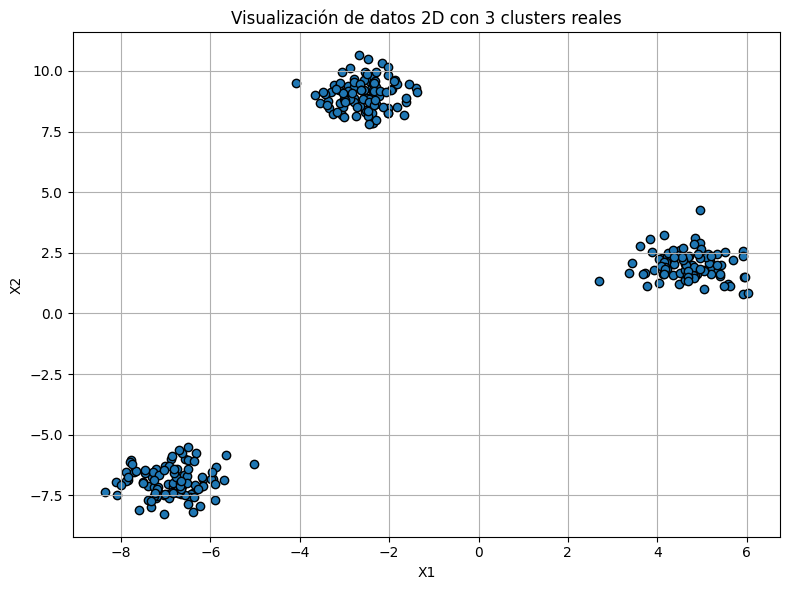

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Crear dataset sintético en 2D con 3 clusters
X, y_true = make_blobs(n_samples=300, centers=3, cluster_std=0.60, random_state=42)

# Visualización inicial
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], cmap='viridis', edgecolor='k')
plt.title("Visualización de datos 2D con 3 clusters reales")
plt.xlabel("X1")
plt.ylabel("X2")
plt.grid(True)
plt.tight_layout()
plt.show()

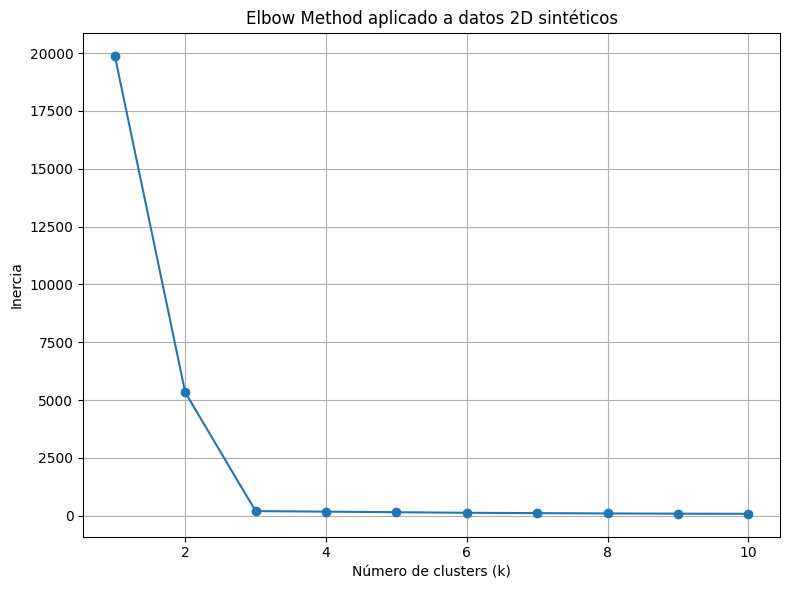

In [ ]:
from sklearn.cluster import KMeans

# Calcular la inercia para distintos valores de k
inertias = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertias, marker='o')
plt.title("Elbow Method aplicado a datos 2D sintéticos")
plt.xlabel("Número de clusters (k)")
plt.ylabel("Inercia")
plt.grid(True)
plt.tight_layout()
plt.show()

El codo aparece claramente en k = 3, lo que coincide con el número de clusters reales.

**Ejecución de K-Means con k = 3:**



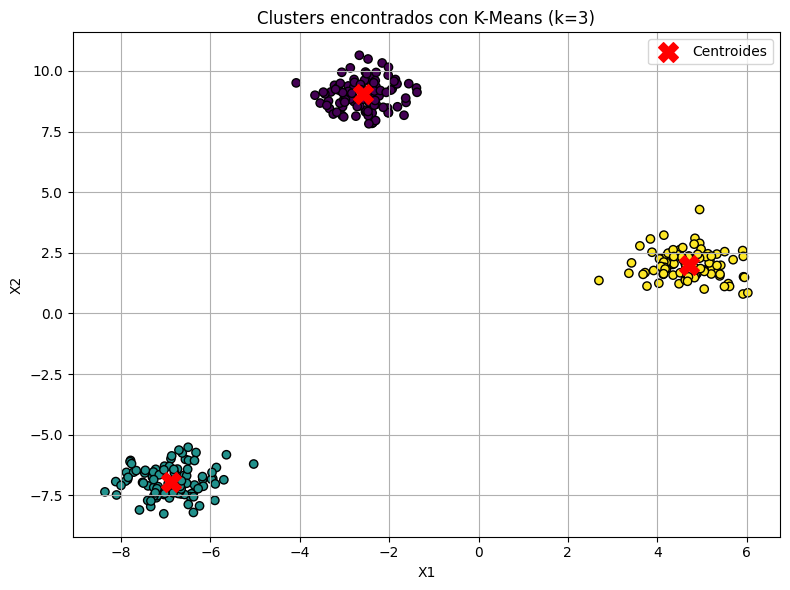

In [ ]:
# Ejecutar K-Means con k=3
kmeans_final = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans_final.fit_predict(X)
centroids = kmeans_final.cluster_centers_

# Visualizar los clusters encontrados
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='viridis', edgecolor='k')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroides')
plt.title("Clusters encontrados con K-Means (k=3)")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Silhouette Score


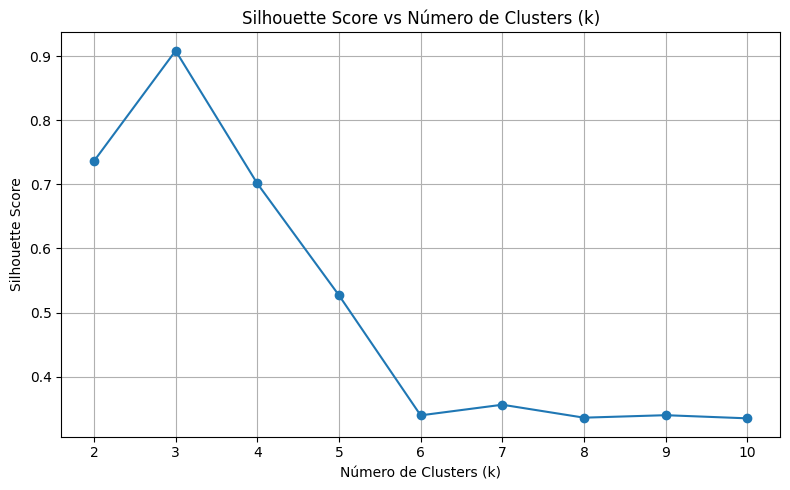

El valor óptimo de k según el Silhouette Score es: 3


In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np


# Crear dataset sintético en 2D con 3 clusters
X, y_true = make_blobs(n_samples=300, centers=3, cluster_std=0.60, random_state=42)

# Evaluar Silhouette Score para distintos valores de k
range_k = range(2, 11)
silhouette_scores = []

for k in range_k:
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)


# Graficar los resultados
plt.figure(figsize=(8, 5))
plt.plot(range_k, silhouette_scores, marker='o')
plt.title('Silhouette Score vs Número de Clusters (k)')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.tight_layout()
plt.show()

# Imprimir el mejor k
best_k = range_k[np.argmax(silhouette_scores)]
print(f"El valor óptimo de k según el Silhouette Score es: {best_k}")


En ambos métodos el valor óptimo de K es 3.

Probaremos otro ejemplo, utilizando un dataset de dígitos

El valor óptimo de k según el Silhouette Score es: 12


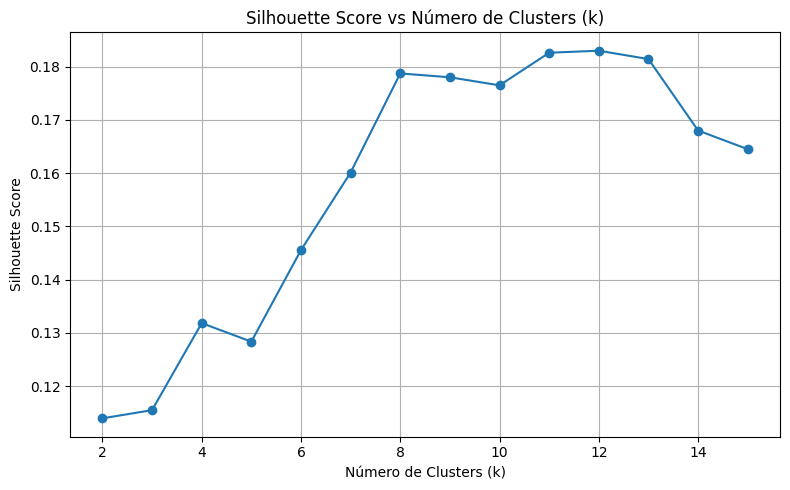

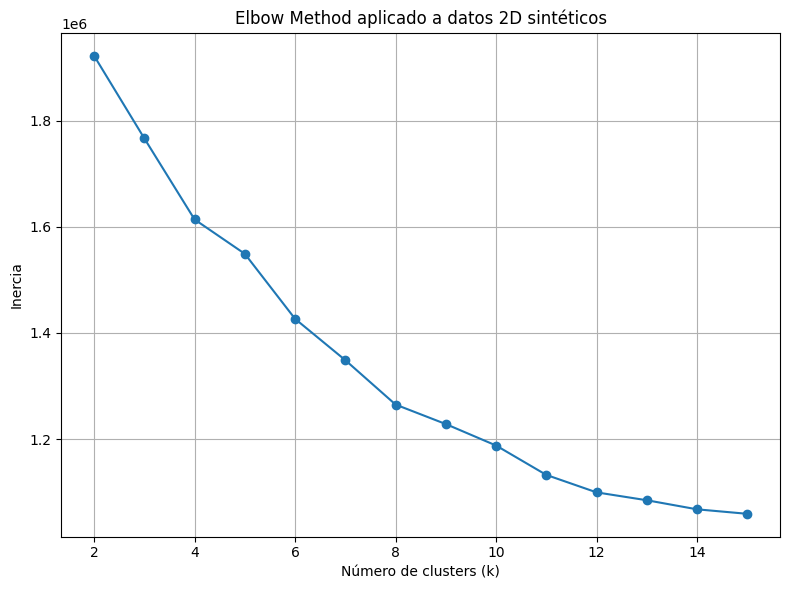

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import numpy as np

# Cargar el dataset de dígitos
digits = load_digits()
X = digits.data
y = digits.target

# Evaluar Silhouette Score para distintos valores de k
range_k = range(2, 16)
silhouette_scores = []

for k in range_k:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

# Determinar el mejor k
best_k = range_k[np.argmax(silhouette_scores)]
print(f"El valor óptimo de k según el Silhouette Score es: {best_k}")

# Graficar los resultados
plt.figure(figsize=(8, 5))
plt.plot(range_k, silhouette_scores, marker='o')
plt.title('Silhouette Score vs Número de Clusters (k)')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.tight_layout()
plt.show()

#Evaluar Elbow
inertias = []
k_values = range(2, 16)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertias, marker='o')
plt.title("Elbow Method aplicado a datos 2D sintéticos")
plt.xlabel("Número de clusters (k)")
plt.ylabel("Inercia")
plt.grid(True)
plt.tight_layout()
plt.show()

Para el caso de Elbow Method no queda claro donde se forma el codo. Mientras Silhouette Score indica que el óptimo son 12 clusters.

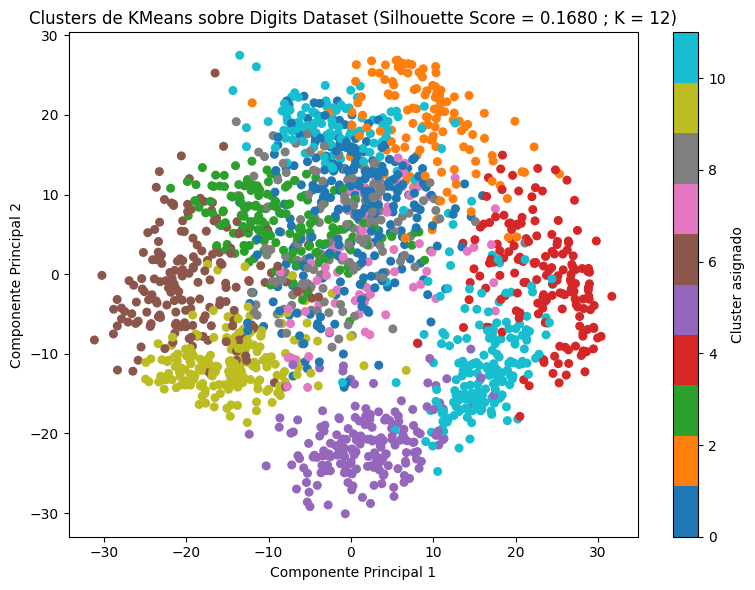

In [ ]:

# Aplicar KMeans con 12 clusters
kmeans = KMeans(n_clusters=12, random_state=42)
labels = kmeans.fit_predict(X)

# Reducir la dimensionalidad para visualizar los clusters
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Graficar los clusters en 2D
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='tab10', s=30)
plt.title(f'Clusters de KMeans sobre Digits Dataset (Silhouette Score = {silhouette_scores[best_k]:.4f} ; K = {best_k})')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar(scatter, label='Cluster asignado')
plt.tight_layout()
plt.show()

# DBSCAN

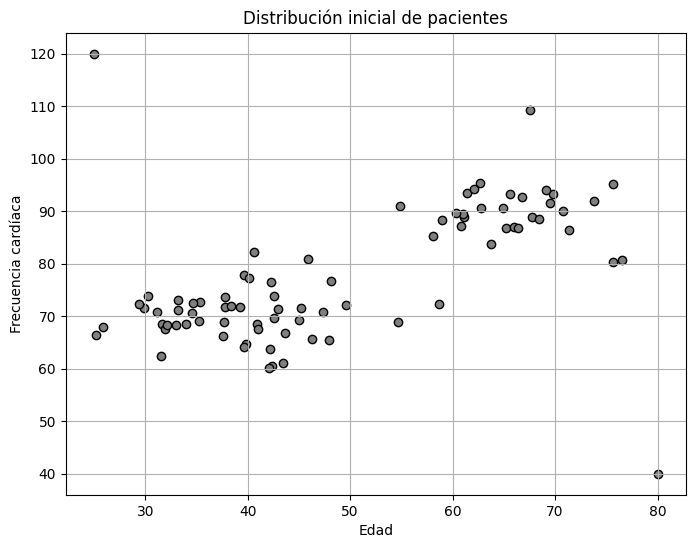

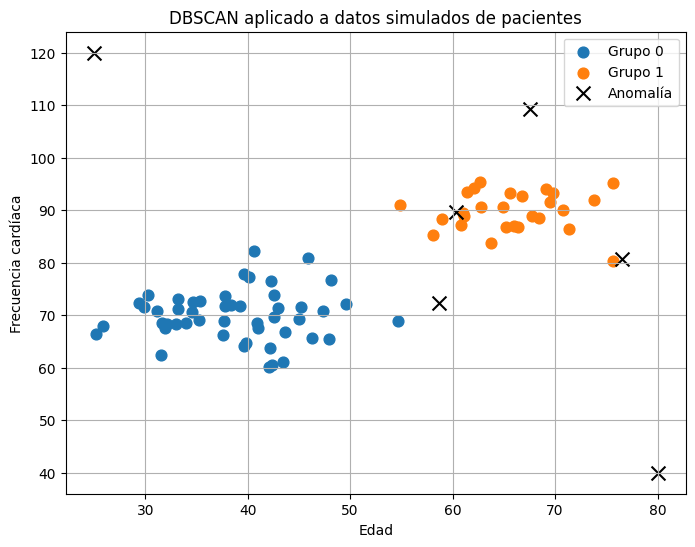

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

# Simular datos de pacientes: [edad, frecuencia cardíaca, presión arterial, temperatura]
np.random.seed(42)
normal_patients = np.random.normal(loc=[40, 70, 120, 36.5], scale=[10, 5, 10, 0.3], size=(50, 4))
high_risk_patients = np.random.normal(loc=[65, 90, 160, 38.5], scale=[5, 5, 10, 0.3], size=(30, 4))
anomalies = np.array([[25, 120, 200, 40], [80, 40, 90, 35]])  # pacientes con signos vitales extremos

# Unir todos los datos
data = np.vstack((normal_patients, high_risk_patients, anomalies))

# Visualización inicial: Edad vs Frecuencia cardíaca
plt.figure(figsize=(8, 6))
plt.scatter(data[:, 0], data[:, 1], c='gray', edgecolors='k')
plt.xlabel('Edad')
plt.ylabel('Frecuencia cardíaca')
plt.title('Distribución inicial de pacientes')
plt.grid(True)
plt.show()

# Estandarizar los datos
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Aplicar DBSCAN
db = DBSCAN(eps=0.8, min_samples=5)
labels = db.fit_predict(data_scaled)

# Visualización de resultados: Edad vs Frecuencia cardíaca
plt.figure(figsize=(8, 6))
unique_labels = set(labels)
colors = [plt.cm.tab10(i) for i in range(len(unique_labels))]

for k, col in zip(unique_labels, colors):
    class_member_mask = (labels == k)
    xy = data[class_member_mask]
    if k == -1:
        plt.scatter(xy[:, 0], xy[:, 1], c='black', marker='x', s=100, label='Anomalía')
    else:
        plt.scatter(xy[:, 0], xy[:, 1], c=[col], s=60, label=f'Grupo {k}')

plt.xlabel('Edad')
plt.ylabel('Frecuencia cardíaca')
plt.title('DBSCAN aplicado a datos simulados de pacientes')
plt.legend()
plt.grid(True)
plt.show()


###¿Por qué DBSCAN marca puntos como ruido aunque estén cerca de otros?
**1. No cumplen con min_samples en su vecindad**

DBSCAN considera un punto como núcleo si tiene al menos min_samples puntos (incluyéndose a sí mismo) dentro de un radio eps.
Si un punto está cerca de otros, pero no hay suficientes vecinos dentro de eps, se considera ruido.

**2. No están conectados a un punto núcleo**

Un punto puede estar cerca de otros, pero si ninguno de esos puntos es núcleo, no se puede expandir un cluster desde él.
En ese caso, el punto no se asigna a ningún cluster y se etiqueta como ruido.

**3. Escala de los datos**

Si las variables tienen escalas muy distintas (por ejemplo, edad en años vs presión arterial en mmHg), la distancia euclidiana puede estar dominada por una sola variable.
Esto puede hacer que puntos cercanos en algunas dimensiones no lo sean en el espacio normalizado.

**4. Parámetros mal ajustados (eps y min_samples)**

Un eps muy pequeño puede fragmentar clusters.
Un min_samples muy alto puede hacer que pocos puntos sean considerados núcleo.

####**K-Means vs DBSCAN**

Dataset de representaciones de observaciones de dos características

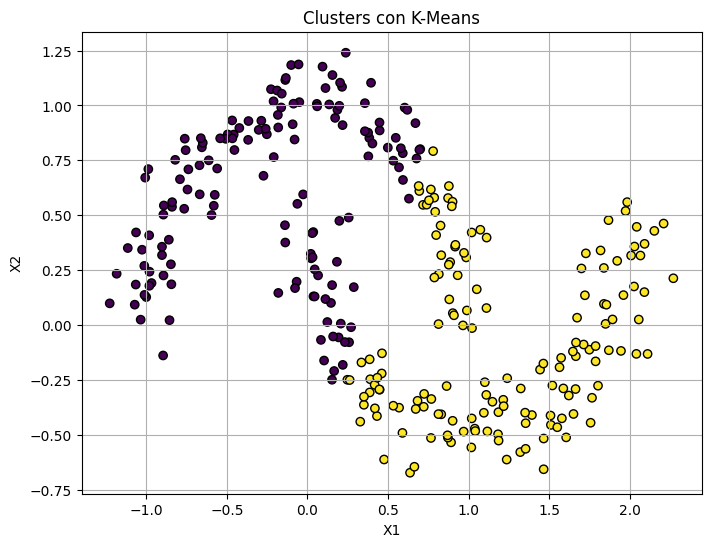

In [ ]:
from sklearn.datasets import make_moons
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Crear dataset
X, _ = make_moons(n_samples=300, noise=0.1, random_state=42)

# Aplicar K-Means
kmeans = KMeans(n_clusters=2, random_state=42)
labels_kmeans = kmeans.fit_predict(X)

# Visualizar
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels_kmeans, cmap='viridis', edgecolor='k')
plt.title("Clusters con K-Means")
plt.xlabel("X1")
plt.ylabel("X2")
plt.grid(True)
plt.show()

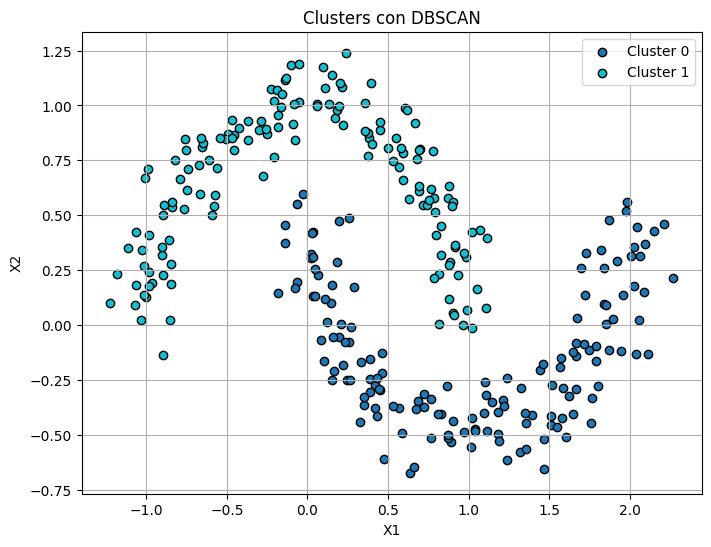

In [ ]:
from sklearn.cluster import DBSCAN
import numpy as np

# Aplicar DBSCAN
dbscan = DBSCAN(eps=0.2, min_samples=5)
labels_dbscan = dbscan.fit_predict(X)

# Visualizar
plt.figure(figsize=(8, 6))
unique_labels = np.unique(labels_dbscan)
colors = plt.cm.tab10(np.linspace(0, 1, len(unique_labels)))

for label, color in zip(unique_labels, colors):
    mask = labels_dbscan == label
    if label == -1:
        plt.scatter(X[mask, 0], X[mask, 1], c='red', edgecolor='k', label='Ruido')
    else:
        plt.scatter(X[mask, 0], X[mask, 1], c=[color], edgecolor='k', label=f'Cluster {label}')

plt.title("Clusters con DBSCAN")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()
plt.grid(True)
plt.show()

##Comparación de resultados
**K-Means**
* Agrupa los datos en formas convexas.
* No detecta bien la estructura curva del dataset.
* No identifica puntos de ruido o anomalías.

**DBSCAN**
* Agrupa los datos según densidad, respetando la forma curva.
* Detecta ruido (puntos en rojo) que no pertenecen a ningún cluster.
* No requiere especificar el número de clusters.

#  Hierarchical Clustering
##Agglomerative (bottom-up)
El corte de clusters que se desean generar se debe definir visualmente con el Dendrograma.

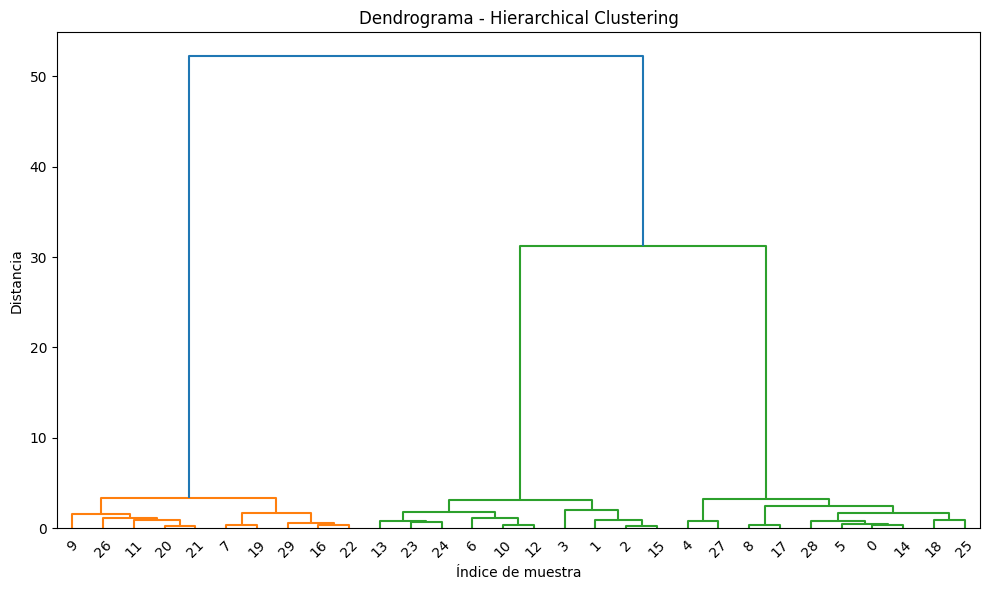

Según del Dendrograma, el corte se da en k=3


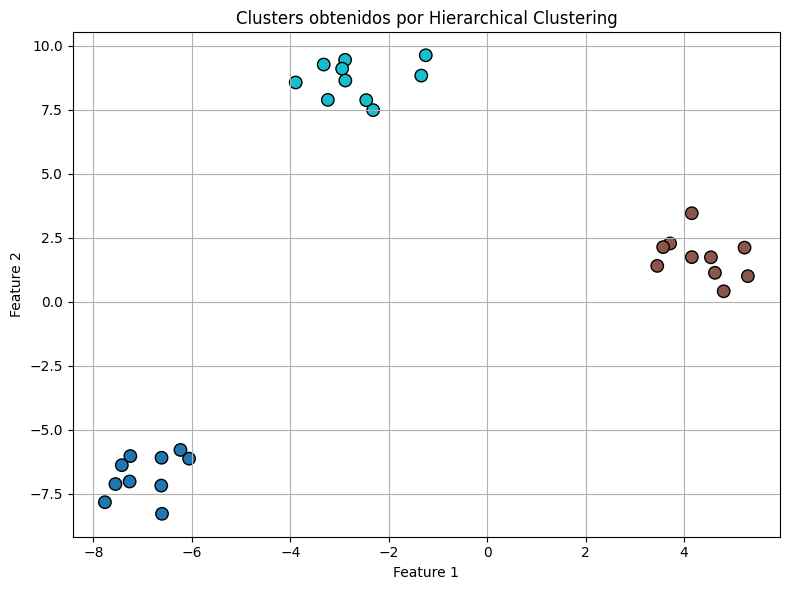

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.datasets import make_blobs

# Paso 1: Crear datos simulados
X, _ = make_blobs(n_samples=30, centers=3, cluster_std=0.80, random_state=42)

# Paso 2: Calcular la matriz de enlace (linkage)
Z = linkage(X, method='ward')  # 'ward' minimiza la varianza dentro de los clusters

# Paso 3: Visualizar el dendrograma
plt.figure(figsize=(10, 6))
dendrogram(Z)
plt.title('Dendrograma - Hierarchical Clustering')
plt.xlabel('Índice de muestra')
plt.ylabel('Distancia')
plt.tight_layout()
plt.show()

print("Según del Dendrograma, el corte se da en k=3")

# Paso 4: Cortar el dendrograma para obtener clusters
clusters = fcluster(Z, t=3, criterion='maxclust')  # t=3 indica que queremos 3 clusters

# Paso 5: Visualizar los clusters en el espacio de características
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='tab10', s=80, edgecolors='k')
plt.title('Clusters obtenidos por Hierarchical Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.tight_layout()
plt.show()


### ¿Qué pasa si hubiesemos cortado en k= 4 o k=6?

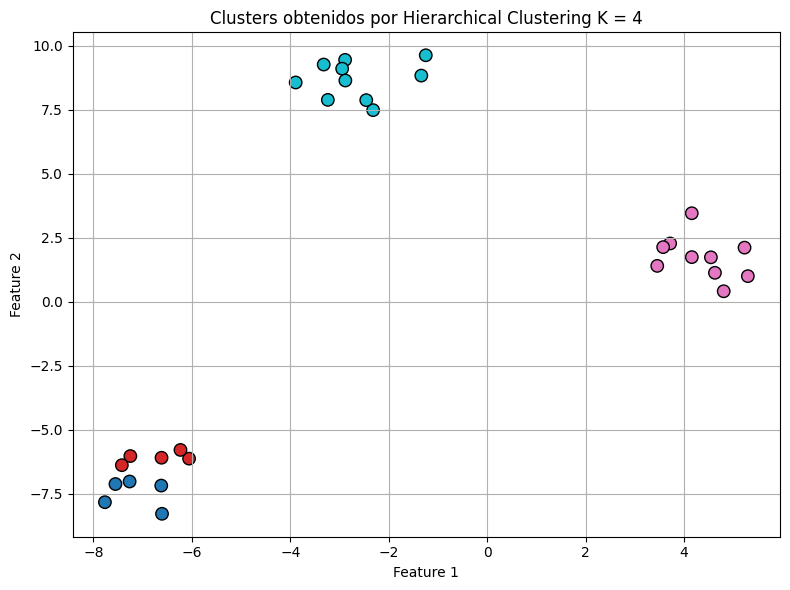

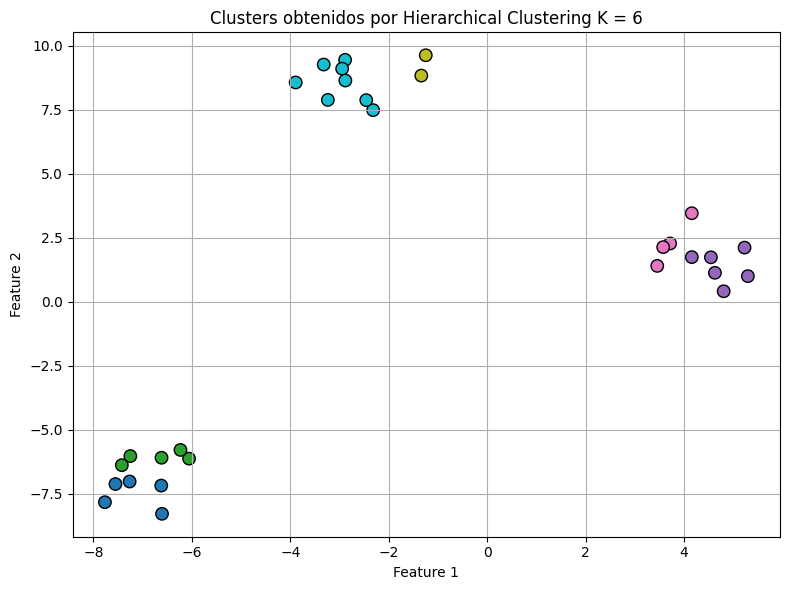

In [ ]:
#K = 4
# Paso 4: Cortar el dendrograma para obtener clusters
clusters = fcluster(Z, t=4, criterion='maxclust')  # t=4 indica que queremos 4 clusters

# Paso 5: Visualizar los clusters en el espacio de características
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='tab10', s=80, edgecolors='k')
plt.title('Clusters obtenidos por Hierarchical Clustering K = 4')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.tight_layout()
plt.show()

# K = 6
# Paso 4: Cortar el dendrograma para obtener clusters
clusters = fcluster(Z, t=6, criterion='maxclust')  # t=6 indica que queremos 6 clusters

# Paso 5: Visualizar los clusters en el espacio de características
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='tab10', s=80, edgecolors='k')
plt.title('Clusters obtenidos por Hierarchical Clustering K = 6')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.tight_layout()
plt.show()

**Mayor detalle:** El corte en 6 permite ver subgrupos dentro de los clusters principales.

**Fragmentación:** Aunque los datos fueron generados con 3 centros, el corte en 6 divide algunos grupos en partes más pequeñas.

**Exploración útil:** Puede ser útil si estás buscando segmentos más específicos dentro de una población más amplia.

**Advertencia:** Si el objetivo es representar los grupos naturales, k = 6 podría sobresegmentar y generar clusters que no tienen una interpretación clara.

## Mini-Batch K-Means vs K-Means Tradicional

In [ ]:
import pandas as pd
import numpy as np
import time
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Simular un dataset de 1 millón de clientes
np.random.seed(42)
n = 1000000

data = pd.DataFrame({
    'Edad': np.random.randint(18, 70, size=n),
    'Prima': np.random.uniform(300, 2000, size=n),
    'Siniestros': np.random.poisson(1.5, size=n)
})

# Escalar los datos
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# K-Means tradicional
start_kmeans = time.time()
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(data_scaled)
kmeans_time = time.time() - start_kmeans

# Mini-Batch K-Means
start_mbkmeans = time.time()
mbkmeans = MiniBatchKMeans(n_clusters=5, batch_size=10000, random_state=42)
mbkmeans.fit(data_scaled)
mbkmeans_time = time.time() - start_mbkmeans

# Mostrar tiempos de ejecución
print(f"Tiempo de ejecución K-Means tradicional: {kmeans_time:.2f} segundos")
print(f"Tiempo de ejecución Mini-Batch K-Means: {mbkmeans_time:.2f} segundos")


Tiempo de ejecución K-Means tradicional: 0.94 segundos
Tiempo de ejecución Mini-Batch K-Means: 0.44 segundos


**Observaciones**
* Mini-Batch K-Means fue más casi 2 veces más rápido que K-Means tradicional.
* Esto lo hace ideal para procesos en tiempo real o en sistemas con restricciones de memoria.
* Aunque puede perder algo de precisión, es una excelente opción para entornos productivos con grandes volúmenes de datos.

**Adjusted Rand Index (ARI)**
* Mide la similitud entre dos agrupamientos.
* Útil si quieres ver qué tan parecidos son los clusters generados por ambos métodos.

**Interpretación del ARI**

Rango de valores: ARI ∈ [−1, 1]
* 0: agrupamientos aleatorios (sin relación)
* 1: agrupamientos idénticos
* < 0: peor que agrupamiento aleatorio (muy raro en práctica)

**Ejemplo:** Si tienes 5 clusters en K-Means y Mini-Batch K-Means. Si la mayoría de los puntos que están juntos en un cluster en uno de los métodos también están juntos en el otro, el ARI será alto. Si los agrupamientos difieren mucho, el ARI será bajo.

In [ ]:
from sklearn.metrics import adjusted_rand_score

ari = adjusted_rand_score(kmeans.labels_, mbkmeans.labels_)
print(f"Adjusted Rand Index: {ari:.4f}")


Adjusted Rand Index: 0.9221


La estructura de agrupamiento es muy similar entre los dos métodos.

## Clustering Distribuido

In [ ]:
# Parte 1: K-Means tradicional con scikit-learn
import pandas as pd
import time
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Cargar el dataset Iris desde URL
url = "https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv"
df = pd.read_csv(url)

# Seleccionar columnas numéricas
features = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]

# Escalar datos
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Aplicar K-Means tradicional
start_kmeans = time.time()
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(features_scaled)
kmeans_time = time.time() - start_kmeans
kmeans_score = silhouette_score(features_scaled, kmeans_labels)

# Parte 2: K-Means distribuido con PySpark MLlib
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler, StandardScaler as SparkScaler
from pyspark.ml.clustering import KMeans as SparkKMeans
from pyspark.ml.evaluation import ClusteringEvaluator

# Inicializar Spark
spark = SparkSession.builder.appName("KMeansComparison").getOrCreate()

# Crear DataFrame Spark
spark_df = spark.createDataFrame(df)

# VectorAssembler
assembler = VectorAssembler(inputCols=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], outputCol='features')
spark_data = assembler.transform(spark_df)

# Escalar datos en Spark
scaler = SparkScaler(inputCol='features', outputCol='scaled_features')
scaler_model = scaler.fit(spark_data)
spark_scaled_data = scaler_model.transform(spark_data)

# Aplicar K-Means distribuido
start_spark_kmeans = time.time()
spark_kmeans = SparkKMeans(k=3, featuresCol='scaled_features', predictionCol='cluster')
spark_model = spark_kmeans.fit(spark_scaled_data)
spark_time = time.time() - start_spark_kmeans

# Evaluar con Silhouette Score
predictions = spark_model.transform(spark_scaled_data)
evaluator = ClusteringEvaluator(featuresCol='scaled_features', predictionCol='cluster', metricName='silhouette')
spark_score = evaluator.evaluate(predictions)

# Comparación de resultados
print("Comparación entre K-Means tradicional y distribuido (PySpark):")
print(f"Tiempo K-Means tradicional (scikit-learn): {kmeans_time:.4f} segundos")
print(f"Silhouette Score K-Means tradicional: {kmeans_score:.4f}")
print(f"Tiempo K-Means distribuido (PySpark): {spark_time:.4f} segundos")
print(f"Silhouette Score K-Means distribuido: {spark_score:.4f}")


Comparación entre K-Means tradicional y distribuido (PySpark):
Tiempo K-Means tradicional (scikit-learn): 0.0126 segundos
Silhouette Score K-Means tradicional: 0.4787
Tiempo K-Means distribuido (PySpark): 8.2512 segundos
Silhouette Score K-Means distribuido: 0.6441


####**Tiempo de iteración**
**scikit-learn (en este ejemplo es más rápido):**

* Corre en memoria local.
* Dataset Iris es pequeño (150 filas, 4 columnas).
* Algoritmo optimizado para entornos single-node.


**PySpark (en este ejempl es más lento):**

* Inicializa un cluster distribuido (SparkSession, DAG, tareas).
* Overhead de comunicación y planificación es grande para datasets pequeños.
* Spark brilla en datasets masivos, no en casos pequeños.


####**Silhouette Score:** Evalúa qué tan bien separados y compactos están los clusters.

**scikit-learn < PySpark**
¿Por qué Spark obtiene mejor score?
* Spark MLlib usa una implementación optimizada que puede:
  * Diferir en inicialización de centroides (k-means|| vs k-means++).
  * Ajustar iteraciones y tolerancias.
    * Posible diferencia en escalamiento interno o manejo de precisión.
    * Ambos algoritmos son K-Means, pero no idénticos en detalles.

**Para datasets pequeños, scikit-learn es más rápido y suficiente.**

**Para datasets grandes o distribuidos, PySpark es necesario aunque tenga overhead.**

**La diferencia en Silhouette Score no significa que Spark sea “mejor” siempre; depende de parámetros y optimización.**

In [ ]:
# Parte 1: Simulación de datos grandes
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

np.random.seed(42)
n = 500000

df = pd.DataFrame({
    'sepal_length': np.random.normal(5.8, 0.8, n),
    'sepal_width': np.random.normal(3.0, 0.4, n),
    'petal_length': np.random.normal(3.7, 1.5, n),
    'petal_width': np.random.normal(1.2, 0.5, n)
})

df.to_csv("iris_grande.csv", index=False)


In [ ]:
import time
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Cargar y escalar
df = pd.read_csv("iris_grande.csv")
scaler = StandardScaler()
features_scaled = scaler.fit_transform(df)

# K-Means tradicional
start_kmeans = time.time()
kmeans = KMeans(n_clusters=3, random_state=42)
labels_kmeans = kmeans.fit_predict(features_scaled)
kmeans_time = time.time() - start_kmeans
kmeans_score = silhouette_score(features_scaled, labels_kmeans)


In [ ]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler, StandardScaler as SparkScaler
from pyspark.ml.clustering import KMeans as SparkKMeans
from pyspark.ml.evaluation import ClusteringEvaluator

# Inicializar Spark
spark = SparkSession.builder.appName("KMeansGrande").getOrCreate()
spark_df = spark.read.csv("iris_grande.csv", header=True, inferSchema=True)

# VectorAssembler
assembler = VectorAssembler(inputCols=spark_df.columns, outputCol="features")
data = assembler.transform(spark_df)

# Escalar
scaler = SparkScaler(inputCol="features", outputCol="scaled_features")
scaler_model = scaler.fit(data)
data_scaled = scaler_model.transform(data)

# K-Means distribuido
start_spark = time.time()
kmeans_spark = SparkKMeans(k=3, featuresCol="scaled_features", predictionCol="cluster")
model_spark = kmeans_spark.fit(data_scaled)
spark_time = time.time() - start_spark

# Evaluación
predictions = model_spark.transform(data_scaled)
evaluator = ClusteringEvaluator(featuresCol="scaled_features", predictionCol="cluster", metricName="silhouette")
spark_score = evaluator.evaluate(predictions)


In [ ]:
print("Comparación de rendimiento:")
print(f"K-Means tradicional - Tiempo: {kmeans_time:.2f}s, Silhouette: {kmeans_score:.4f}")
print(f"K-Means distribuido - Tiempo: {spark_time:.2f}s, Silhouette: {spark_score:.4f}")

Comparación de rendimiento:
K-Means tradicional - Tiempo: 0.05s, Silhouette: 0.1519
K-Means distribuido - Tiempo: 11.10s, Silhouette: 0.2530


## Sampling inteligente
Este dataset contiene información de clientes de una empresa de telecomunicaciones, con variables como:

* Género, tipo de contrato, servicios contratados
* Tenure (antigüedad), cargos mensuales
* Variable objetivo: Churn --> Fuga



In [ ]:
import pandas as pd

# Cargar el dataset directamente desde la URL
url = "https://raw.githubusercontent.com/albayraktaroglu/Datasets/master/churn.csv"
df = pd.read_csv(url)

# Ver las primeras filas
df.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


/tmp/ipython-input-1880550250.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_df = df.groupby('Churn?', group_keys=False).apply(lambda x: x.sample(frac=0.3, random_state=42))


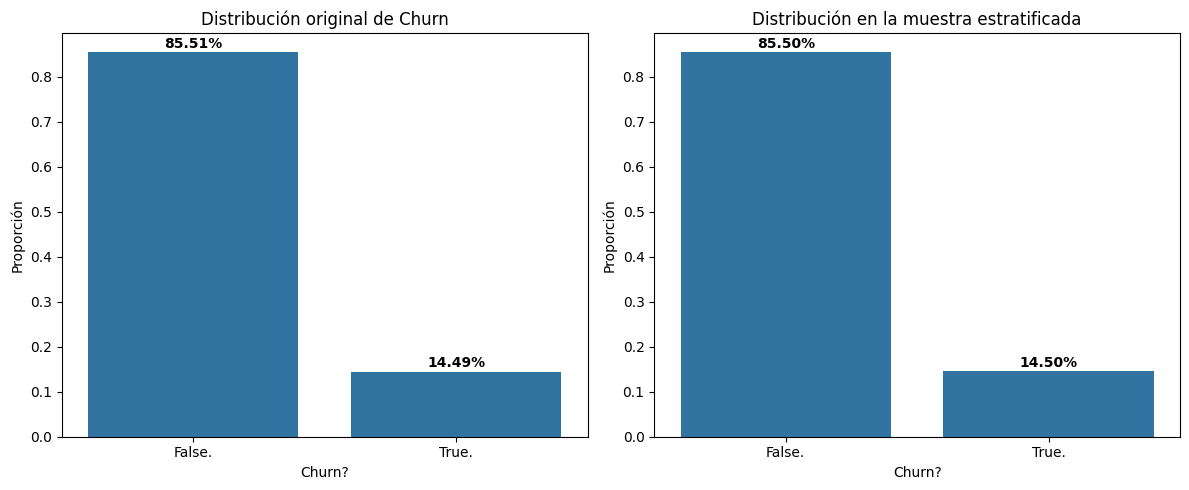

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Mostrar distribución original
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Distribución original
original_dist = df['Churn?'].value_counts(normalize=True)

# Muestreo estratificado: 20% de cada clase
sampled_df = df.groupby('Churn?', group_keys=False).apply(lambda x: x.sample(frac=0.3, random_state=42))
sampled_dist = sampled_df['Churn?'].value_counts(normalize=True)


# Visualización comparativa con etiquetas
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Gráfico original
sns.barplot(x=original_dist.index, y=original_dist.values, ax=ax[0])
ax[0].set_title('Distribución original de Churn')
ax[0].set_ylabel('Proporción')
for i, v in enumerate(original_dist.values):
    ax[0].text(i, v + 0.01, f"{v:.2%}", ha='center', fontweight='bold')

# Gráfico muestreado
sns.barplot(x=sampled_dist.index, y=sampled_dist.values, ax=ax[1])
ax[1].set_title('Distribución en la muestra estratificada')
ax[1].set_ylabel('Proporción')
for i, v in enumerate(sampled_dist.values):
    ax[1].text(i, v + 0.01, f"{v:.2%}", ha='center', fontweight='bold')

plt.tight_layout()
plt.show()


* La distribución original de la variable Churn muestra un fuerte desbalance (por ejemplo, ~85.5% "No" y ~14.5% "Yes").
* Al aplicar muestreo estratificado, se toma el 30% de cada clase, lo que preserva la proporción entre clases en la muestra.
* La visualización comparativa confirma que la muestra estratificada refleja la distribución original.

El muestreo estratificado es una técnica efectiva para reducir el tamaño del dataset sin introducir sesgos en la variable objetivo. Esto es especialmente útil en problemas de clasificación con clases desbalanceadas, como el churn, donde mantener la proporción de clases es clave para entrenar modelos representativos.

## Reducción de dimensionalidad

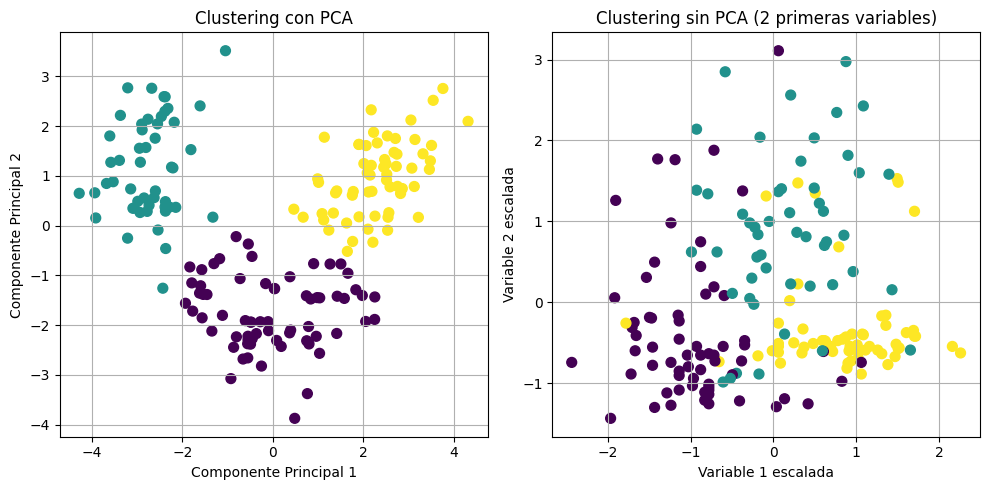

Silhouette Score sin PCA: 0.28
Silhouette Score con PCA: 0.56


In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Cargar el dataset de vinos
data = load_wine()
X = data.data
y = data.target

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Clustering sin PCA
kmeans_no_pca = KMeans(n_clusters=3, random_state=42)
labels_no_pca = kmeans_no_pca.fit_predict(X_scaled)
score_no_pca = silhouette_score(X_scaled, labels_no_pca)

# Aplicar PCA para reducir a 2 componentes
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Clustering con PCA
kmeans_pca = KMeans(n_clusters=3, random_state=42)
labels_pca = kmeans_pca.fit_predict(X_pca)
score_pca = silhouette_score(X_pca, labels_pca)

# Visualización de los clusters con PCA
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_pca, cmap='viridis', s=50)
plt.title("Clustering con PCA")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels_no_pca, cmap='viridis', s=50)
plt.title("Clustering sin PCA (2 primeras variables)")
plt.xlabel("Variable 1 escalada")
plt.ylabel("Variable 2 escalada")
plt.grid(True)

plt.tight_layout()
plt.show()

# Mostrar los Silhouette Scores
print(f"Silhouette Score sin PCA: {score_no_pca:.2f}")
print(f"Silhouette Score con PCA: {score_pca:.2f}")

####**¿Qué mide el Silhouette Score?**

Evalúa qué tan bien separados y compactos están los clusters.
Valores posibles:

* **+0.5** → Clusters bien definidos y separados.
* **[0.25,0.5]** → Clusters aceptables.
* **0** → Puntos cerca de los límites entre clusters.
* **-0** → Puntos mal asignados (más cerca de otro cluster que el asignado).

**Sin PCA: 0.28**

* Clusters son poco definidos.
* Alta superposición entre grupos.
* Las 13 variables originales pueden tener ruido o redundancia que afecta la separación.


**Con PCA: 0.56**

* Clusters son mucho más compactos y separados.
* PCA eliminó redundancia y concentró la varianza en 2 dimensiones relevantes.
* Mejora significativa en la calidad del clustering.

PCA no solo a visualizar, también puede mejorar la estructura del clustering al reducir ruido y correlación entre variables. Sin embargo, 0.56 no es perfecto. aún hay cierta superposición, lo que indica que los datos no forman clusters completamente separados.

##**¿Y si se considera UMAP?**

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


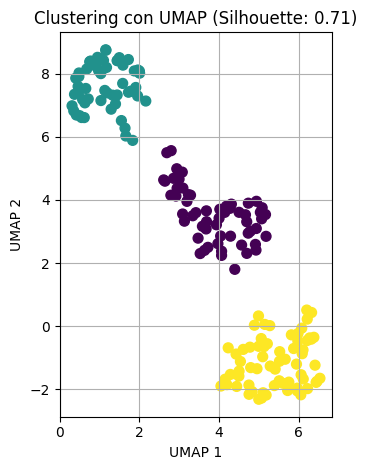

Silhouette Score con UMAP: 0.71


In [ ]:
import umap

reducer = umap.UMAP(n_components=2, random_state=42)
X_umap = reducer.fit_transform(X_scaled)
kmeans_umap = KMeans(n_clusters=3, random_state=42)
labels_umap = kmeans_umap.fit_predict(X_umap)
score_umap = silhouette_score(X_umap, labels_umap)

plt.subplot(1, 2, 2)
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=labels_umap, cmap='viridis', s=50)
plt.title(f'Clustering con UMAP (Silhouette: {score_umap:.2f})')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.grid(True)

plt.tight_layout()
plt.show()

print(f"Silhouette Score con UMAP: {score_umap:.2f}")



* **Con UMAP, el Silhouette Score es mejor que PCA, dado que preserva relaciones no lineales.**

* **UMAP muestra clusters más separados y definidos que PCA.**

In [ ]:

from sklearn.metrics import adjusted_rand_score
import pandas as pd

# Comparar etiquetas
ari_score = adjusted_rand_score(labels_no_pca, labels_pca)
print(f"Índice de Rand Ajustado (ARI) PCA vs No-PCA: {ari_score:.2f}")

# Matriz de contingencia
contingency_matrix = pd.crosstab(labels_no_pca, labels_pca)
print("\nMatriz de contingencia:")
print(contingency_matrix)


Índice de Rand Ajustado (ARI) PCA vs No-PCA: 0.97

Matriz de contingencia:
col_0   0   1   2
row_0            
0      65   0   0
1       1  50   0
2       1   0  61



####**Indice ARI:** métrica que mide la similitud entre dos agrupamientos.
* 1.0 → Los dos agrupamientos son idénticos.
* 0.0 → Agrupamientos son aleatorios (sin relación).
* < 0 → Peor que aleatorio (muy raro en práctica).

* **Índice de Rand Ajustado (ARI): 0.97** → Esto indica que los clusters obtenidos con PCA son muy similares a los obtenidos sin PCA (casi idénticos en estructura).

####**Matriz de contingencia:** tabla que compara dos conjuntos de etiquetas (clusters) para ver cómo se alinean entre sí. Permite evaluar si la reducción de dimensionalidad (PCA) preserva la estructura original del clustering.
Para este caso:
* **Filas:** Clusters obtenidos sin PCA.
* **Columnas:** Clusters obtenidos con PCA.
* **Valores:** Número de puntos que coinciden en cada combinación.

* La mayoría de los puntos se mantienen en el mismo cluster después de aplicar PCA.
* Solo hay 2 puntos que cambiaron de cluster, lo que confirma que PCA no distorsionó la estructura, sino que la simplificó para visualización.

In [ ]:

from sklearn.metrics import adjusted_rand_score
import pandas as pd

# Comparar etiquetas
ari_score = adjusted_rand_score(labels_umap, labels_pca)
print(f"Índice de Rand Ajustado (ARI) UMAP vs PCA: {ari_score:.2f}")

# Matriz de contingencia
contingency_matrix = pd.crosstab(labels_umap, labels_pca)
print("\nMatriz de contingencia:")
print(contingency_matrix)


Índice de Rand Ajustado (ARI) UMAP vs PCA: 0.87

Matriz de contingencia:
col_0   0   1   2
row_0            
0      59   0   0
1       4  50   0
2       4   0  61


**ARI de un 0.87, implica una consistencia alta, ambos métodos mantienen estructura similar.**
* Solo 8 puntos fueron clasificados distintos.

In [ ]:

from sklearn.metrics import adjusted_rand_score
import pandas as pd

# Comparar etiquetas
ari_score = adjusted_rand_score(labels_umap, labels_no_pca)
print(f"Índice de Rand Ajustado (ARI) UMAP vs No-PCA: {ari_score:.2f}")

# Matriz de contingencia
contingency_matrix = pd.crosstab(labels_umap, labels_no_pca)
print("\nMatriz de contingencia:")
print(contingency_matrix)


Índice de Rand Ajustado (ARI) UMAP vs No-PCA: 0.90

Matriz de contingencia:
col_0   0   1   2
row_0            
0      59   0   0
1       3  51   0
2       3   0  62


**ARI de un 0.9, implica una consistencia alta, ambos métodos mantienen estructura similar.**
* Solo 6 puntos fueron clasificados distintos.

#### **UMAP**

Aplicar UMAP antes de KMeans tiene varias ventajas importantes frente a usar PCA o no reducir dimensionalidad:

**1. Preserva relaciones no lineales**

* UMAP captura estructuras complejas en los datos (curvas, agrupaciones no lineales) que PCA no puede.
* Esto permite que KMeans trabaje sobre un espacio donde los clusters son más naturales.

**2. Mejora la separación de clusters**

* Al proyectar los datos en 2D o 3D manteniendo la estructura local y global, los clusters suelen quedar más compactos y separados.
* Esto se traduce en Silhouette Scores más altos y mejor rendimiento del clustering.

**3. Visualización clara**

* UMAP genera representaciones visuales donde los grupos son fáciles de identificar.
* Ideal para análisis exploratorio y comunicación de resultados.


**4. Escalabilidad**

* UMAP es eficiente para datasets medianos y grandes, y soporta paralelización.
Mejor opción que t-SNE para grandes volúmenes de datos.

**5. Flexibilidad**

Permite ajustar parámetros como n_neighbors y min_dist para controlar:

* Estructura local (clusters pequeños).
* Estructura global (clusters grandes).

**(*) Consideraciones**

* UMAP es no lineal, por lo que las dimensiones reducidas no son interpretables como en PCA.
  * Con PCA puedes decir: "Componente 1 está asociado a estas variables".
  * Con UMAP no puedes hacer eso: las dimensiones son abstractas, diseñadas para la geometría del grafo, no para interpretabilidad.
* Requiere más tiempo de cómputo que PCA.

#### **PCA**

**1. Interpretabilidad**

* Cada componente principal es una combinación lineal de las variables originales.
* Puedes analizar qué variables contribuyen más a cada componente → útil para explicar resultados.

**2. Velocidad y simplicidad**

* PCA es muy rápido y computacionalmente eficiente incluso para datasets grandes.
* Fácil de implementar y ajustar (solo decides el número de componentes).

**3. Reducción de ruido**

* PCA elimina redundancia entre variables correlacionadas.
* Esto ayuda a KMeans a trabajar en un espacio más limpio y estable.

**4. Mejora del clustering**

* Aunque PCA es lineal, suele mejorar la calidad del clustering respecto a usar todas las variables originales.
  * En ejemplo: Silhouette Score pasó de 0.28 (sin reducción) a 0.56 (con PCA).

#### **PCA vs UMAP**
**PCA es ideal cuando:**

* Buscas interpretabilidad, poder explicar los componentes con un significado directo.
* Dataset tiene muchas variables correlacionadas.
* Solución rápida y eficiente.

**UMAP es mejor cuando:**
* Los datos tienen estructuras no lineales.
* La visualización y separación clara de clusters es prioritaria.